 
 The data set contains 3 classes of 50 samples each, where each class refers to a type of iris plant
 We need to predict the name of the flower by the length and width of petal and sepal
 The names of the 3 flowerrs are as follow 
 0 - Setosa
 1 - Versicolor
 2 - Virginica


In [3]:
#import packages
from sklearn.linear_model import LogisticRegression #Logistic regression model
from sklearn.model_selection import train_test_split #splitting data to validate model
from sklearn.datasets import load_iris #dataset
import pandas as pd  #pandas for data analysis
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

C:\rahul\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\rahul\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\rahul\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


make dataframe

In [4]:
df = pd.DataFrame(data=load_iris()['data'], columns=load_iris()['feature_names'])
df['target'] = load_iris()['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


we have 50 samples of each flower 

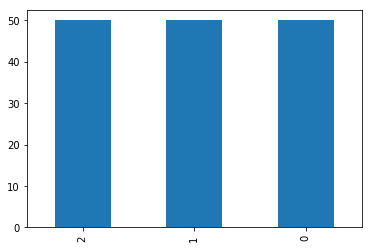

In [5]:
df['target'].value_counts().plot(kind='bar')

lets split the data to training set and validation set

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']], df['target'])

lets fit the data to the model 

In [13]:
clf = LogisticRegression(solver='newton-cg').fit(x_train, y_train)

WE CAN USE THE FOLLOWING SOLVER DEPENDING ON THE CLASSIFICATION TYPE

solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

‘liblinear’ and ‘saga’ also handle L1 penalty

‘saga’ also supports ‘elasticnet’ penalty

‘liblinear’ does not support setting penalty='none'

Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

# current parameters of the class

In [14]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# lets check the prediction now

In [15]:
pred = clf.predict(x_test)

print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.92      0.85      0.88        13
          2       0.88      0.93      0.90        15

avg / total       0.92      0.92      0.92        38



# we can see that our accuracy is 92%
